### Linear Regression Model to determine Student's Score
#### About the Dataset
The dataset we are going to use for this Model has Two Columns with the details of Hours a student studies and the Marks Scored by him. The dataset is [Student Score Dataset](http://bit.ly/w-data).
#### About the Model
Linear Regression is a machine learning algorithm based on supervised learning. Linear regression attempts to model the relationship between two variables by fitting a linear equation to the observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. Here the Score is linearly related to the Number of hours a Student Studies. 
#### Author - Navjot Singh Bajaj
#### Data Science & Business Analytics Intern at The Spark Foundation
##### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Importing Dataset 

In [2]:
url="http://bit.ly/w-data"
data = pd.read_csv(url)
print("The dataset is Imported.")

The dataset is Imported.


In [3]:
data.shape #To Find the shape of the dataset

(25, 2)

In this dataset, there are 2 variales and 25 rows in this Dataset. The First Column is Hours (Independent Variable) and Score (Depending Variable)

In [4]:
data.head() #To print the the first five row

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.describe() #describing Dataset using Statistics

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info() #getting the info of the Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


##### Data Visualization using Scatter Plot

Text(0, 0.5, 'Scores')

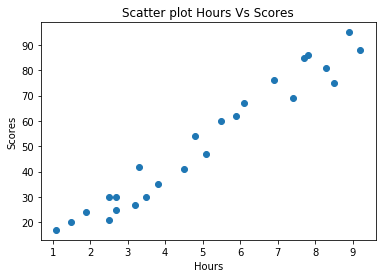

In [8]:
plt.scatter(data["Hours"],data["Scores"])
plt.title("Scatter plot Hours Vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")

In [9]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


This shows that variables are positively correlated with each others.
##### Model Preparations
###### Formatting the data for our Model

In [10]:
X = data.iloc[ : , :-1]
y = data.iloc[ : ,-1]
# Here X is hours and y is Scores

##### Dividing the Dataset into Training and Testing Set

In [12]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)
# Splitting the Dataset into 80:20 ( 80% data for Training and 20% data for testing)

##### Training The Model

In [13]:
reg_model = LinearRegression()
reg_model.fit(x_train,y_train)
print("Model is Trained!!")

Model is Trained!!


##### Regression Coffiecient and Regression Constant 

In [16]:
slope = reg_model.coef_
print("The Slope/ Regression Coefficient of the Model :",slope[0])

The Slope/ Regression Coefficient of the Model : 9.910656480642237


In [17]:
intercept = reg_model.intercept_
print("The Intercept/ Regression Constant of the Model :",intercept)

The Intercept/ Regression Constant of the Model : 2.018160041434683


##### Plotting The Regression Line

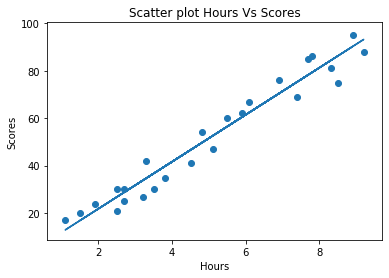

In [18]:
line=slope*X + intercept
plt.plot(X,line)
plt.scatter(X,y)
plt.title("Scatter plot Hours Vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [19]:
print("Training Score: ",reg_model.score(x_train,y_train))

Training Score:  0.9515510725211553


##### Making Predictions

In [20]:
y_pred=reg_model.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

##### Comparing Actual Data and Predicated Data

In [21]:
#Comparing the actual y_test set and predicted y_pred data we get
df = pd.DataFrame({'Actual': y_test, 'predicted': y_pred, 'Difference/Error': y_test - y_pred})
df

,Actual,predicted,Difference/Error
5,20,16.884145,3.115855
2,27,33.732261,-6.732261
19,69,75.357018,-6.357018
16,30,26.794801,3.205199
11,62,60.491033,1.508967


##### Visualizing The Actual and Predicted Points

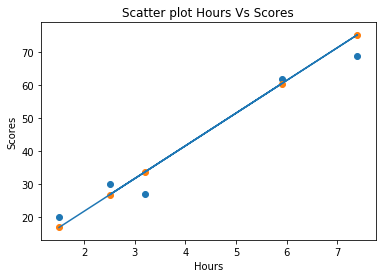

In [22]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_pred)
plt.plot(x_test,y_pred)
plt.title("Scatter plot Hours Vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

#### Predicting Score if a student studies x = 9.25 hours/day

In [23]:
x = [[9.25]]
pred = reg_model.predict(x)
print("Score obtained by the student if he studies for 9.25 hours/day = ",pred[0])

Score obtained by the student if he studies for 9.25 hours/day =  93.69173248737538


##### Model Evaluation 
For Evaluation of the Regression Model Sklearn module provide many metrics. We are going to use these metrics to evaluate our model.

__1 Mean absolute error__ : It provide risk metric corresponding to the expected value of the absolute error loss.

__2 Mean squared error__ : It provide a risk metric corresponding to the expected value of the squared (quadratic) error or loss. It has a parameter name Squared. If Squared is True it returns MSE value, if False it returns RMSE value.

__3 r2-score__ : It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R² score of 0.0.


In [24]:
# mean_absolute_error
print("Mean Absolute Error : ",mean_absolute_error(y_test, y_pred))

Mean Absolute Error :  4.183859899002975


In [25]:
# mean_squared_error ( MSE Value)
print("Mean Squared Error ( MSE Value) :",mean_squared_error(y_test, y_pred))

Mean Squared Error ( MSE Value) : 21.5987693072174


In [26]:
# mean_squared_error ( RMSE Value)
print("Mean Squared Error ( RMSE Value) :",mean_squared_error(y_test, y_pred, squared=False))

Mean Squared Error ( RMSE Value) : 4.6474476121003665


In [27]:
#R2_Score
print("Prediction Score : ", r2_score(y_test, y_pred))

Prediction Score :  0.9454906892105356
